# Linear Regression Forcasting 

- Here we are forecasting the demand of the certain store:

In [1]:
#importing general packages 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the sklearn packages for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
#Reading the file from data path
path = r'C:\Users\gitaa\Desktop\Data'
df_tr = pd.read_csv(path+'\\train_forcasting.csv')
df_te= pd.read_csv(path+'\\test_forcasting.csv')

In [49]:
#looking for data 
print('Train shape:\n',df_tr.shape)
print('Test shape:\n',df_te.shape)

Train shape:
 (913000, 4)
Test shape:
 (45000, 4)


In [50]:
# Looking at the data
df_tr.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [51]:
#looking for null value
df_tr.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [52]:
#Looking for data type
df_tr.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

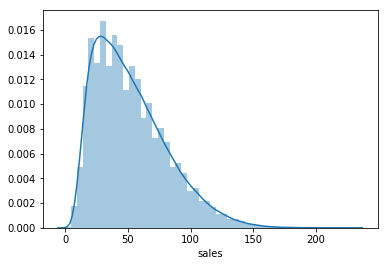

In [53]:
#Making sure the data is normal for target variable: Sales
sns.distplot(df_tr['sales'],kde = True)
plt.show()

Data looks little bit right skewed
- tried log but it has 0 so I tried Square root transformation
- it removed the skewness of the data
- Note: you have to remember that you have transfered your target so you have to invert back after prediction of test i.e. you have to square the value of prediction for actual result

In [54]:
# Sqrt root transformation of data
df_tr['sqrt_sales']=np.sqrt(df_tr.sales)

In [55]:
# validating data
df_tr.head()

,date,store,item,sales,sqrt_sales
0,2013-01-01,1,1,13,3.605551
1,2013-01-02,1,1,11,3.316625
2,2013-01-03,1,1,14,3.741657
3,2013-01-04,1,1,13,3.605551
4,2013-01-05,1,1,10,3.162278


In [60]:
# looking at the test data
df_te.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


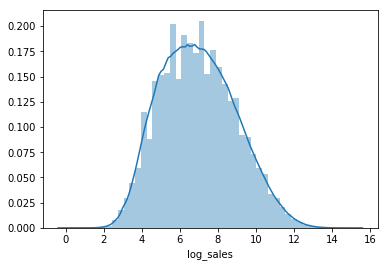

In [41]:
#Distplot after transformation
sns.distplot(df_tr['sqrt_sales'],kde = True)
plt.show()

In [56]:
#looking at the description
df_tr.describe()

,store,item,sales,sqrt_sales
count,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,6.954347
std,2.872283,14.430878,28.801144,1.971637
min,1.000000,1.000000,0.000000,0.000000
25%,3.000000,13.000000,30.000000,5.477226
50%,5.500000,25.500000,47.000000,6.855655
75%,8.000000,38.000000,70.000000,8.366600
max,10.000000,50.000000,231.000000,15.198684


# handling the data inconsistance issue
- conver the object types of date into datetime format

In [57]:
#converting the date into datetime format from object
for dr in [df_tr,df_te]: 
    dr['date']=pd.to_datetime(dr['date'])

In [59]:
# validating my results
print('print the data types in Train:\n', df_tr.dtypes)
print('print the data types in Test:\n', df_te.dtypes)

print the data types in Train:
 date          datetime64[ns]
store                  int64
item                   int64
sales                  int64
sqrt_sales           float64
dtype: object
print the data types in Test:
 id                int64
date     datetime64[ns]
store             int64
item              int64
dtype: object


In [106]:
#df_te
df_te.isnull().sum()

id                  0
date                0
store               0
item                0
year                0
month               0
day                 0
week                0
weekofyear          0
dayofweek           0
weekday             0
dayofyear           0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
dtype: int64

In [61]:
#data processing for train and test both 
for ds in [df_tr, df_te]:
    ds['year'] = ds['date'].dt.year
    ds['month'] = ds['date'].dt.month
    ds['day'] = ds['date'].dt.day
    ds['week'] = ds['date'].dt.week
    ds['weekofyear'] = ds['date'].dt.weekofyear
    ds['dayofweek'] =ds['date'].dt.dayofweek
    ds['weekday'] = ds['date'].dt.weekday
    ds['dayofyear'] = ds['date'].dt.dayofyear
    ds['quarter'] = ds['date'].dt.quarter
    ds['is_month_start'] = ds['date'].dt.is_month_start
    ds['is_month_end'] = ds['date'].dt.is_month_end
    ds['is_quarter_start'] = ds['date'].dt.is_quarter_start
    ds['is_quarter_end'] = ds['date'].dt.is_quarter_end
    ds['is_year_start'] = ds['date'].dt.is_year_start
    ds['is_year_end'] = ds['date'].dt.is_year_end

In [62]:
df_te.head()

,id,date,store,item,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,0,2018-01-01,1,1,2018,1,1,1,1,0,0,1,1,True,False,True,False,True,False
1,1,2018-01-02,1,1,2018,1,2,1,1,1,1,2,1,False,False,False,False,False,False
2,2,2018-01-03,1,1,2018,1,3,1,1,2,2,3,1,False,False,False,False,False,False
3,3,2018-01-04,1,1,2018,1,4,1,1,3,3,4,1,False,False,False,False,False,False
4,4,2018-01-05,1,1,2018,1,5,1,1,4,4,5,1,False,False,False,False,False,False


In [63]:
df_te_new = df_te.drop('id', axis = 1)

In [64]:
df_te_new.head()

,date,store,item,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2018-01-01,1,1,2018,1,1,1,1,0,0,1,1,True,False,True,False,True,False
1,2018-01-02,1,1,2018,1,2,1,1,1,1,2,1,False,False,False,False,False,False
2,2018-01-03,1,1,2018,1,3,1,1,2,2,3,1,False,False,False,False,False,False
3,2018-01-04,1,1,2018,1,4,1,1,3,3,4,1,False,False,False,False,False,False
4,2018-01-05,1,1,2018,1,5,1,1,4,4,5,1,False,False,False,False,False,False


In [73]:
categorical_var = ['is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 
                  'is_year_start', 'is_year_end']

for dp in [df_tr, df_te_new]:
    for var in categorical_var:
        dp[var]=dp[var].astype('category')
    dp[categorical_var]=dp[categorical_var].apply(lambda x: x.cat.codes)

In [75]:
# After doing this visualize
df_tr.tail()

,date,store,item,sales,sqrt_sales,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
912995,2017-12-27,10,50,63,7.937254,2017,12,27,52,52,2,2,361,4,0,0,0,0,0,0
912996,2017-12-28,10,50,59,7.681146,2017,12,28,52,52,3,3,362,4,0,0,0,0,0,0
912997,2017-12-29,10,50,74,8.602325,2017,12,29,52,52,4,4,363,4,0,0,0,0,0,0
912998,2017-12-30,10,50,62,7.874008,2017,12,30,52,52,5,5,364,4,0,0,0,0,0,0
912999,2017-12-31,10,50,82,9.055385,2017,12,31,52,52,6,6,365,4,0,1,0,1,0,1


In [80]:
# dropping sales column because we are going to use sqrt_transformed sales and drop the date
df_tr.drop(['sales','date'], axis=1, inplace=True)

In [110]:
df_te_new.drop('date', axis=1, inplace=True)

In [81]:
columnsName= list(df_tr.columns)

In [82]:
print(columnsName)

['store', 'item', 'sqrt_sales', 'year', 'month', 'day', 'week', 'weekofyear', 'dayofweek', 'weekday', 'dayofyear', 'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end']


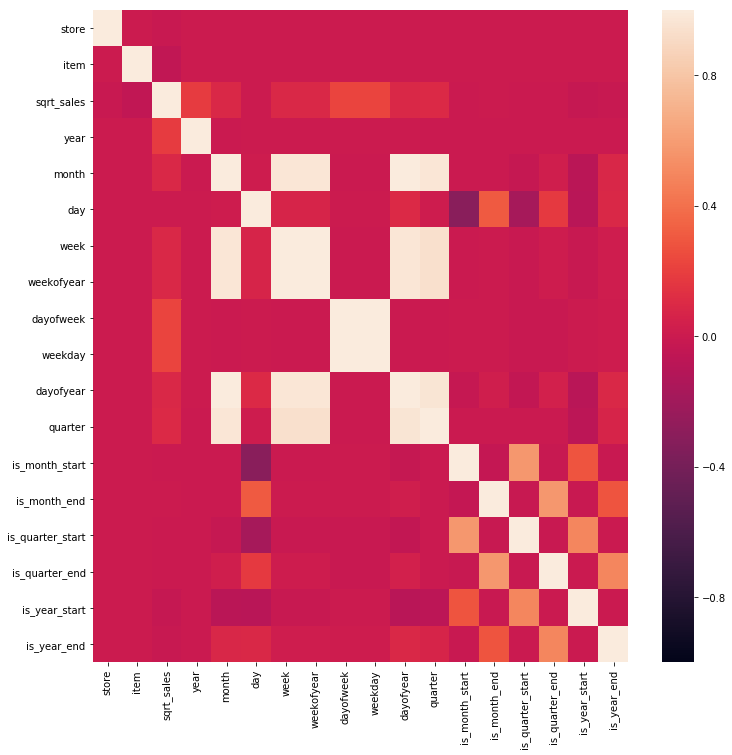

In [89]:
# plotting the heatmap to check the correlation
plt.figure(figsize=(12,12))
corr = df_tr[columnsName].corr()
sns.heatmap(corr,  vmin=-1, vmax=1)

In [91]:
# find the features that highly correlated with target: sqrt_sales
print (corr['sqrt_sales'].sort_values(ascending=False), '\n')

sqrt_sales          1.000000
dayofweek           0.219022
weekday             0.219022
year                0.180354
quarter             0.097945
month               0.092338
dayofyear           0.091207
weekofyear          0.090468
week                0.090468
day                 0.002611
is_month_end        0.000686
is_month_start     -0.000249
is_quarter_start   -0.001958
is_quarter_end     -0.005190
store              -0.008342
is_year_end        -0.021466
is_year_start      -0.030799
item               -0.050367
Name: sqrt_sales, dtype: float64 



In [92]:
# Removing all those columns that saying is : yes/no type
selected_columns = ['store','item','year','month','day','week','weekofyear','dayofweek','weekday','dayofyear','quarter']

In [114]:
X = df_tr[selected_columns]
y = df_tr['sqrt_sales']
test_given=df_te_new[selected_columns]

In [95]:
y.head()

0    3.605551
1    3.316625
2    3.741657
3    3.605551
4    3.162278
Name: sqrt_sales, dtype: float64

In [96]:
# Spliting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [97]:
# printing the shape of Train and test
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((639100, 11), (273900, 11), (273900,), (639100,))

In [107]:
# Linear Regression model fitting
LR = LinearRegression()
LR.fit(X_train, y_train)
sqrt_sales_pred_te = LR.predict(X_test)

# Now predicting on given test data

In [115]:
# predicting on given test with selected column
given_test_sqrtsale_pred=LR.predict(test_given)

In [116]:
# now getting back the original sales by squaring the result
givenTest_sale_pred=list(map(lambda x: x**2, given_test_sqrtsale_pred))

In [117]:
#putting values together with id of the given test data
df_out=pd.DataFrame({'StoreID':df_te.id, 'Predicted':givenTest_sale_pred})

In [118]:
# Visualizing the prediction result for corresponding Store
df_out.head(20)

,StoreID,Predicted
0,0,46.492995
1,1,49.462717
2,2,52.524370
3,3,55.677954
4,4,58.923471
5,5,62.260918
6,6,65.690298
7,7,46.424747
8,8,49.392321
9,9,52.451828


In [120]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,sqrt_sales_pred_te))

r2_score 0.1210333953656636


In [121]:
r2_score(y_test,sqrt_sales_pred_te, multioutput='variance_weighted')

0.1210333953656636

In [122]:
selected_col2=['store','item','year','month','day','week','weekofyear','dayofweek','weekday','dayofyear',
               'quarter','sqrt_sales']

In [123]:
adj_data=df_tr[selected_col2]

In [127]:
adj_data.head()

,store,item,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,sqrt_sales
0,1,1,2013,1,1,1,1,1,1,1,1,3.605551
1,1,1,2013,1,2,1,1,2,2,2,1,3.316625
2,1,1,2013,1,3,1,1,3,3,3,1,3.741657
3,1,1,2013,1,4,1,1,4,4,4,1,3.605551
4,1,1,2013,1,5,1,1,5,5,5,1,3.162278


In [128]:
# Looking at the summary of the model
import statsmodels.formula.api as sm
model = sm.ols(formula='sqrt_sales ~ store+item+year+month+day+week+weekofyear+dayofweek+weekday+dayofyear+quarter',
               data=adj_data)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_sales   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Wed, 25 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:58:44   Log-Likelihood:            -1.8566e+06
No. Observations:              913000   AIC:                         3.713e+06
Df Residuals:                  912990   BIC:                         3.713e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -590.4531      2.809   -210.191      0.000    -595.959    -584.947
store         -0.0057      0.001     -8.500      0.000      -0.007      -0.004
item          -0.0069      0.000    -51.324      0.000      -0.007      -0.007
year           0.2890      0.001    208.376      0.000       0.286       0.292
month         13.8043      0.081    170.277      0.000      13.645      13.963
day            0.4544      0.003    170.207      0.000       0.449       0.460
week           0.0005      0.000      1.847      0.065   -3.03e-05       0.001
weekofyear     0.0005      0.000      1.847      0.065   -3.03e-05       0.001
dayofweek      0.1076      0.000    222.443      0.000       0.107       0.109
weekday        0.1076      0.000    222.443      0.000       0.107       0.109
dayofyear     -0.4552      0.003   -170.685      0.000      -0.460      -0.450
quarter        0.3119      0.007     42.633      0.000       0.298       0.326
==============================================================================
Omnibus:                    27760.418   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14586.011
Skew:                           0.119   Prob(JB):                         0.00
Kurtosis:                       2.428   Cond. No.                     2.42e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.4e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [129]:
# Adding only 3
model2 = sm.ols(formula='sqrt_sales ~ store+item+year',
               data=adj_data)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_sales   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 1.108e+04
Date:                Wed, 25 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:06:14   Log-Likelihood:            -1.8990e+06
No. Observations:              913000   AIC:                         3.798e+06
Df Residuals:                  912996   BIC:                         3.798e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.5620      2.888   -172.959      0.000    -505.223    -493.901
store         -0.0057      0.001     -8.114      0.000      -0.007      -0.004
item          -0.0069      0.000    -48.994      0.000      -0.007      -0.007
year           0.2515      0.001    175.439      0.000       0.249       0.254
==============================================================================
Omnibus:                    22791.044   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15696.693
Skew:                           0.210   Prob(JB):                         0.00
Kurtosis:                       2.514   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
import statsmodels.formula.api as sm
model3 = sm.ols(formula='sqrt_sales ~ store+item+year+month+day',
               data=adj_data)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_sales   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     8340.
Date:                Wed, 25 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:07:35   Log-Likelihood:            -1.8949e+06
No. Observations:              913000   AIC:                         3.790e+06
Df Residuals:                  912994   BIC:                         3.790e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -500.0415      2.876   -173.896      0.000    -505.677    -494.406
store         -0.0057      0.001     -8.151      0.000      -0.007      -0.004
item          -0.0069      0.000    -49.212      0.000      -0.007      -0.007
year           0.2515      0.001    176.266      0.000       0.249       0.254
month          0.0528      0.001     90.290      0.000       0.052       0.054
day            0.0003      0.000      1.473      0.141      -0.000       0.001
==============================================================================
Omnibus:                    22009.420   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15264.704
Skew:                           0.207   Prob(JB):                         0.00
Kurtosis:                       2.520   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# check the result by removing all the in-significance features (i.e feature with p-valu>0.05)
import statsmodels.formula.api as sm
model4 = sm.ols(formula='sqrt_sales ~ store+item+year+month+day+dayofweek+weekday+dayofyear+quarter',
               data=adj_data)
fitted4 = model4.fit()
fitted4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_sales   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                 1.567e+04
Date:                Wed, 25 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:08:38   Log-Likelihood:            -1.8566e+06
No. Observations:              913000   AIC:                         3.713e+06
Df Residuals:                  912991   BIC:                         3.713e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -590.5404      2.809   -210.251      0.000    -596.045    -585.035
store         -0.0057      0.001     -8.500      0.000      -0.007      -0.004
item          -0.0069      0.000    -51.324      0.000      -0.007      -0.007
year           0.2890      0.001    208.438      0.000       0.286       0.292
month         13.8045      0.081    170.279      0.000      13.646      13.963
day            0.4543      0.003    170.198      0.000       0.449       0.460
dayofweek      0.1076      0.000    222.442      0.000       0.107       0.109
weekday        0.1076      0.000    222.442      0.000       0.107       0.109
dayofyear     -0.4550      0.003   -170.691      0.000      -0.460      -0.450
quarter        0.3127      0.007     42.835      0.000       0.298       0.327
==============================================================================
Omnibus:                    27777.106   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14591.301
Skew:                           0.119   Prob(JB):                         0.00
Kurtosis:                       2.428   Cond. No.                     7.23e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""